# Session 5 further work

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Matrix approach to boundary-value problems

### Question 1

In [2]:
def cross_sec_area(x):
    """Return cross-sectional area of bar pi*(2-x)**2/10000"""
    return np.pi*(2-x)*(2-x)/10000.0

In [14]:
N = 7
delta_x = 1.0/(N+1)
xi = np.arange(0.0,1.0-delta_x,delta_x)
main_diag = -cross_sec_area(xi)-cross_sec_area(xi+delta_x)
upper_diag = cross_sec_area(xi)[1:N]
lower_diag = cross_sec_area(xi)[1:N]
M = np.diag(main_diag) + np.diag(upper_diag,k=1) + np.diag(lower_diag,k=-1)
np.set_printoptions(precision=5)
print(M)

[[-0.00236  0.0011   0.       0.       0.       0.       0.     ]
 [ 0.0011  -0.00207  0.00096  0.       0.       0.       0.     ]
 [ 0.       0.00096 -0.00179  0.00083  0.       0.       0.     ]
 [ 0.       0.       0.00083 -0.00154  0.00071  0.       0.     ]
 [ 0.       0.       0.       0.00071 -0.0013   0.00059  0.     ]
 [ 0.       0.       0.       0.       0.00059 -0.00108  0.00049]
 [ 0.       0.       0.       0.       0.       0.00049 -0.00089]]


Text(0.5, 1.0, 'Temperature in varying bar')

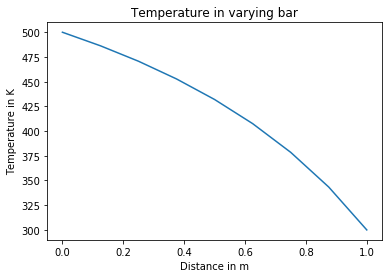

In [15]:
b = np.zeros(N)
b[0] = -500*cross_sec_area(0.0)
b[N-1] = -300*cross_sec_area(1.0-delta_x) # This needs to be x+delta_x for x=delta_x*(N-1)
theta = np.dot(np.linalg.inv(M),b)
theta_full = np.zeros(N+2)
theta_full[0] = 500
theta_full[1:N+1] = theta
theta_full[N+1] = 300
x = np.linspace(0,1,N+2)
plt.plot(x,theta_full)
plt.xlabel('Distance in m')
plt.ylabel('Temperature in K')
plt.title('Temperature in varying bar')

## 5. Parabolic equations

### Question 1

In [16]:
def calc_M(N,zeta):
    """Calculate matrix M for Crank-Nicolson solution of heat equation
    Inputs: 
    N    size of matrix
    zeta parameter
    Outputs:
    (NxN) matrix"""
    diag = 2*(1+zeta)*np.ones(N)
    offdiag = -zeta*np.ones(N-1)
    output = np.diag(diag) + np.diag(offdiag,k=1) + np.diag(offdiag,k=-1)
    return output

In [17]:
def calc_N(N,zeta):
    """Calculate matrix M for Crank-Nicolson solution of heat equation
    Inputs: 
    N    size of matrix
    zeta parameter
    Outputs:
    (NxN) matrix"""
    diag = 2*(1-zeta)*np.ones(N)
    offdiag = zeta*np.ones(N-1)
    output = np.diag(diag) + np.diag(offdiag,k=1) + np.diag(offdiag,k=-1)
    return output

In [18]:
matM = calc_M(5,0.5)
print(matM)

[[ 3.  -0.5  0.   0.   0. ]
 [-0.5  3.  -0.5  0.   0. ]
 [ 0.  -0.5  3.  -0.5  0. ]
 [ 0.   0.  -0.5  3.  -0.5]
 [ 0.   0.   0.  -0.5  3. ]]


In [19]:
matN = calc_N(5,0.5)
print(matN)

[[1.  0.5 0.  0.  0. ]
 [0.5 1.  0.5 0.  0. ]
 [0.  0.5 1.  0.5 0. ]
 [0.  0.  0.5 1.  0.5]
 [0.  0.  0.  0.5 1. ]]


### Question 2

In [20]:
N = 7
zeta = 0.5
matM = calc_M(N-2,zeta)
matN = calc_N(N-2,zeta)
matMinv = np.linalg.inv(matM)
b = np.zeros(N-2)
b[0] = 2*zeta*500
b[-1] = 2*zeta*300
matMinvN = np.dot(matMinv,matN)
matMinvb = np.dot(matMinv,b)
Nt = 40
temperature = np.zeros((Nt,N-2))
temperature[0] = 300
for n in range(1,Nt):
    temperature[n] = matMinvb + np.dot(matMinvN,temperature[n-1])

Text(0.5, 1.0, 'Crank-Nicolson solutions for bar (zeta=0.5)')

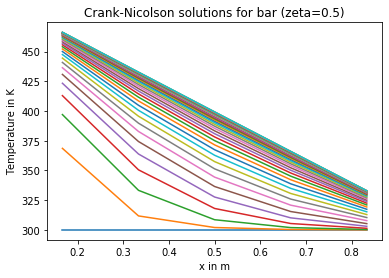

In [21]:
x = np.linspace(1/6,5/6,5)
for n in range(Nt):
    plt.plot(x,temperature[n])
plt.xlabel('x in m')
plt.ylabel('Temperature in K')
plt.title('Crank-Nicolson solutions for bar (zeta=0.5)')

In [22]:
zeta = 2.0
matM = calc_M(N-2,zeta)
matN = calc_N(N-2,zeta)
matMinv = np.linalg.inv(matM)
b = np.zeros(N-2)
b[0] = 2*zeta*500
b[-1] = 2*zeta*300
matMinvN = np.dot(matMinv,matN)
matMinvb = np.dot(matMinv,b)
Nt = 10
temperature = np.zeros((Nt,N-2))
temperature[0] = 300
for n in range(1,Nt):
    temperature[n] = matMinvb + np.dot(matMinvN,temperature[n-1])

Text(0.5, 1.0, 'Crank-Nicolson solutions for bar (zeta=2.0)')

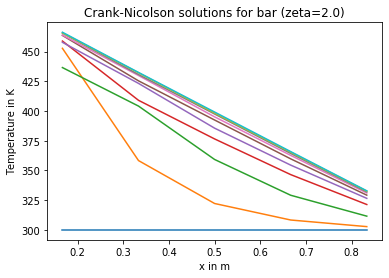

In [23]:
for n in range(Nt):
    plt.plot(x,temperature[n])
plt.xlabel('x in m')
plt.ylabel('Temperature in K')
plt.title('Crank-Nicolson solutions for bar (zeta=2.0)')

Notice that with a large value of $\zeta$ we see some noise in the time evolution (it is no longer smoothly rising) but the long-time temperature distribution is consistent with smaller timesteps.